In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/BankA.csv')
print(df.head())

  institute  age         workclass  education  educational-num  \
0    Bank A   39           Private  Bachelors               13   
1    Bank A   42           Private  Bachelors               13   
2    Bank A   34  Self-emp-not-inc    Masters               14   
3    Bank A   74       Federal-gov  Bachelors               13   
4    Bank A   48           Private    Masters               14   

       marital-status       occupation relationship   race gender  \
0  Married-civ-spouse  Exec-managerial      Husband  White   Male   
1  Married-civ-spouse     Tech-support      Husband  White   Male   
2  Married-civ-spouse            Sales      Husband  White   Male   
3  Married-civ-spouse   Prof-specialty      Husband  White   Male   
4  Married-civ-spouse  Exec-managerial      Husband  White   Male   

   capital-gain  capital-loss  hours-per-week native-country income  
0          7298             0              50  United-States   >50K  
1             0             0              55  U

In [3]:
df = df.replace("?", pd.NA)
df["income"] = df["income"].astype(str).str.strip()
df["income"] = df["income"].str.contains(">50K").astype(int)
num_cols = ["age", "educational-num", "capital-gain", "capital-loss", "hours-per-week"]
cat_cols = [col for col in df.columns if col not in num_cols + ["income"]]
df[cat_cols] = df[cat_cols].fillna("Unknown")

X = df.drop("income", axis=1)
y = df["income"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

preprocess = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

In [4]:
pipeline_lr = Pipeline([
    ("prep", preprocess),
    ("model", LogisticRegression(random_state=42, max_iter=1000, class_weight=None, C=1))
])

pipeline_lr.fit(X_train, y_train)

y_pred = pipeline_lr.predict(X_test)
y_proba = pipeline_lr.predict_proba(X_test)[:, 1]

In [5]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Accuracy: 0.8237
F1-Score: 0.7611
ROC-AUC: 0.9003


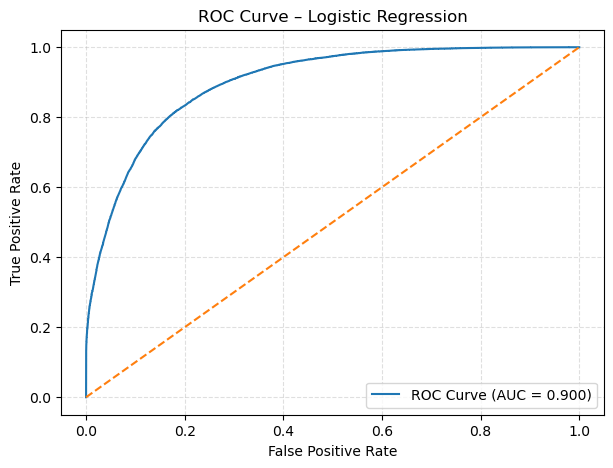

In [6]:
fpr, tpr, thresh = roc_curve(y_test, y_proba)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()
